In [3]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()

In [4]:
filename = 'solardb\AnXin-2020-0505.db'
with sqlite3.connect(filename) as con:
    irrddf05 = pd.read_sql('''select * from imeter_minutely''', con=con)
    tempdf05 = pd.read_sql('''select * from tmeter_minutely''', con=con)
irrddf05.LoggedDatetime = pd.to_datetime(irrddf05.LoggedDatetime) # datetime的部份，需先做過一次轉換
tempdf05.LoggedDatetime = pd.to_datetime(tempdf05.LoggedDatetime) # datetime的部份，需先做過一次轉換

In [5]:
irrddf05.columns

Index(['UniqueID', 'DeviceID', 'LoggedDatetime', 'Value', 'AccValue'], dtype='object')

In [6]:
tempdf05.columns

Index(['UniqueID', 'DeviceID', 'LoggedDatetime', 'Value'], dtype='object')

Text(0.5, 1.0, 'Temperature')

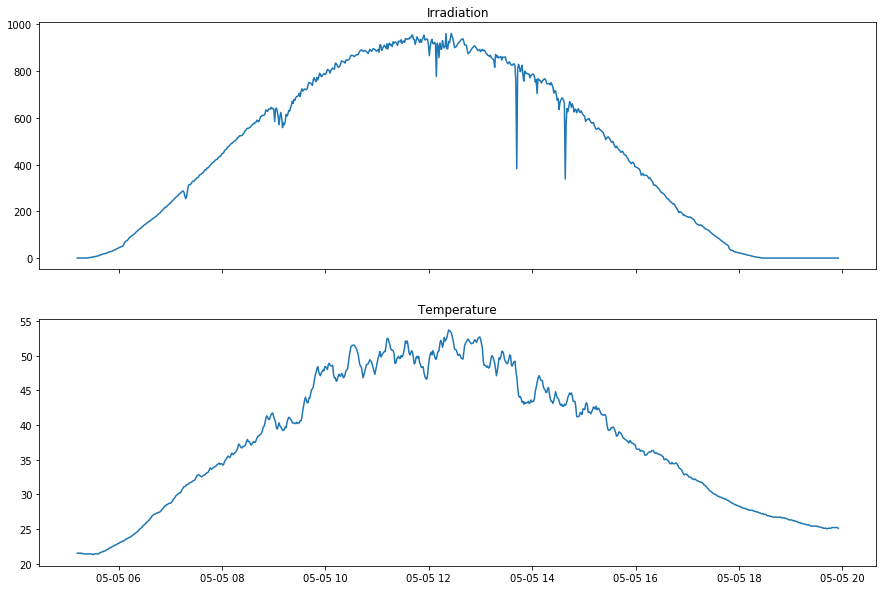

In [7]:
fig, ax = plt.subplots(2, 1, sharex='col', sharey='row')
fig.set_figheight(10)
fig.set_figwidth(15)

ax[0].plot(irrddf05.LoggedDatetime, irrddf05.Value)
ax[0].set_title('Irradiation')
ax[1].plot(tempdf05.LoggedDatetime, tempdf05.Value)
ax[1].set_title('Temperature')